In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Ejercicios de regresión
**Facundo A. Lucianna - Aprendizaje Automático - CEIoT - FIUBA**

Arrancamos con datos sintéticos, para ellos sacamos datos dispersos de una recta de pendiente 3 y ordenada al origen -4, el cual le sumamos un ruido aleatorio normal de media 0 y desvío estándar igual a 1.

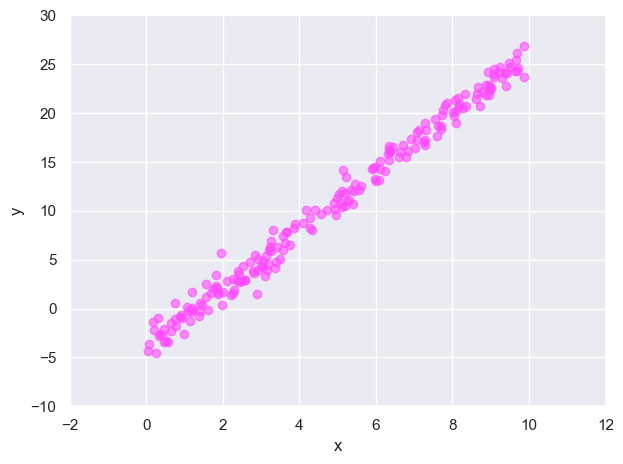

In [2]:
rng = np.random.RandomState(42)
x = rng.rand(200) * 10
y = 3 * x - 4 + rng.randn(200)

plt.scatter(x, y, color="#ff48fd", alpha=0.6);
plt.xlim(-2, 12)
plt.ylim(-10, 30)
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()
plt.show()

Para aplicar el modelo de regresión lineal, la forma de implementarlo usando **scikit-learn**, parámetros y formas de uso la podemos encontrar [acá](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

In [3]:
# Creando el modelo de regresión lineal simple:
from sklearn.linear_model import LinearRegression
regresion = LinearRegression()

Entrenamos el modelo, pasando tanto las observaciones como el label, ya que estamos en aprendizaje supervisado:

In [4]:
# OBS: Scikit-Learn siempre espera que las observaciones sean un array de 2 dimensiones.
regresion.fit(x.reshape([-1, 1]), y)

LinearRegression()

Vemos los parámetros de la recta:

In [5]:
print(f"Pendiente de la recta: {regresion.coef_[0]}")
print(f"Ordenada al origen : {regresion.intercept_}")

Pendiente de la recta: 2.9921928931825024
Ordenada al origen : -3.8947988490391783


Podemos ver que los resultados están muy cerca. 

Veamos los supuestos:

1. **Relación lineal**: Nuestros datos sintéticos se obtuvieron de una relación lineal, por lo que es obvio que se cumple.

In [6]:
# Nuevo verbo, lo usamos para predecir una vez que el modelo fue entrenado.
y_pred = regresion.predict(x.reshape([-1, 1]))

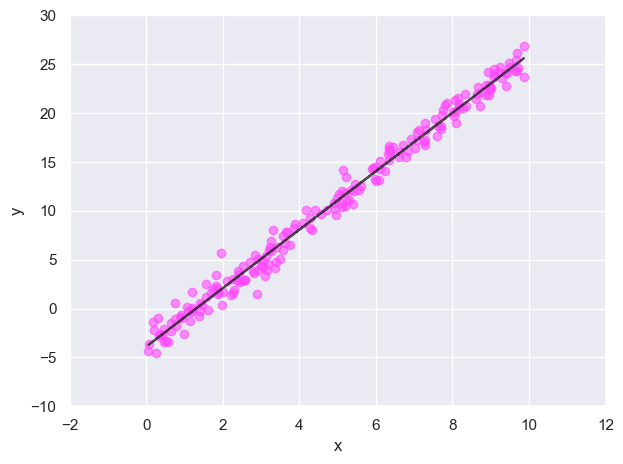

In [7]:
rng = np.random.RandomState(42)

plt.plot(x, y_pred, color="k", alpha=0.75);
plt.scatter(x, y, color="#ff48fd", alpha=0.6);
plt.xlim(-2, 12)
plt.ylim(-10, 30)
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()
plt.show()

2. **Features independientes**: Tenemos un solo feature, por lo que no aplica.
3. **Homocedasticidad**: Veamos gráficamente 

Calculamos los residuos:

In [8]:
residues = y - y_pred

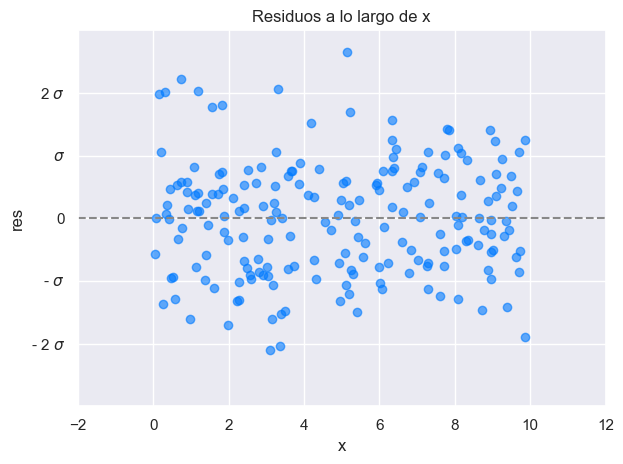

In [9]:
plt.axhline(y=0, color='#888888', linestyle ='--') 
plt.scatter(x, residues, color="#007aff", alpha=0.6)
plt.xlim(-2, 12)
plt.ylim(-3, 3)
plt.yticks([-2, -1, 0, 1, 2], ['- 2 $\sigma$', '- $\sigma$', 0, '$\sigma$', '2 $\sigma$'])
plt.title("Residuos a lo largo de x")
plt.xlabel("x")
plt.ylabel("res")
plt.tight_layout()
plt.show()

Vemos gráficamente que los residuos están a lo largo de x en la misma región, por lo que podemos ver que hay homocedasticidad (OBS: formalmente se debe calcular usando métodos estadísticos). 

4. **Errores independientes**: La anterior gráfica nos indica también que no se observa nada raro en los residuos, es una nube homogénea, por lo que podemos estar bastante seguros que no hay dependencia entre residuos.

----
### Regresión multidimensional

Veamos ahora el caso de más de una dimensión. Geométricamente,la idea es ajustar un plano en un espacio de tres dimensiones, o ajustar un hiperplano en dimensiones superiores.

Creemos los datos sintéticos de tres atributos, para ello, aprovechemos la capacidad de Numpy de realizar eficientemente operaciones vectoriales:

In [10]:
rng = np.random.RandomState(142)
X = 10 * rng.rand(200, 3)
y = 2 + np.dot(X, [-1.75, -1., 2.5]) + rng.randn(200)

Veamos el modelo si puede encontrar los coeficientes:

In [11]:
regresion_mult = LinearRegression()
regresion_mult.fit(X, y)

LinearRegression()

In [12]:
print(f"Coeficientes de la recta: {regresion_mult.coef_}")
print(f"Ordenada al origen : {regresion_mult.intercept_}")

Coeficientes de la recta: [-1.7513135  -1.03788984  2.46722174]
Ordenada al origen : 2.3126174949620513


Vemos que los valores están muy cercas de los verdaderos. Veamos ahora las suposiciones, principalmente la que nos faltaba, **features independientes**, para ello vamos a ver la correlación entre los tres features:

In [13]:
np.corrcoef(X, rowvar=False)

array([[1.        , 0.04418051, 0.07322349],
       [0.04418051, 1.        , 0.07272192],
       [0.07322349, 0.07272192, 1.        ]])

Vemos que los valores de correlación entre columna son muy cercanas a ceros, por lo que podemos estar bastante seguros que se cumple que los features son independientes.

La correlación entre dos variables nos indica que tanto depende una de otra, si valen 1 o -1, en cambio si vale cercano a 0, significa que no hay relación. Cualquier valor intermedio nos da un grado de relación. Es importante que solo medimos la correlación de relaciones lineales, otro tipo de dependencia no es trivial medirla.

Con esta idea podemos ver la correlación entre el label y los atributos:

In [14]:
np.corrcoef(np.concatenate([X, y.reshape(-1, 1)], axis=1), rowvar=False)

array([[ 1.        ,  0.04418051,  0.07322349, -0.52909321],
       [ 0.04418051,  1.        ,  0.07272192, -0.31811787],
       [ 0.07322349,  0.07272192,  1.        ,  0.72518071],
       [-0.52909321, -0.31811787,  0.72518071,  1.        ]])

Vemos que los tres atributos tienen correlación con respecto al label, unas mayor a otros, y esto tienen que ver con el valor del coeficiente, más grande el coeficiente, más grande la correlación, es decir, **el valor del coeficiente nos está indicando la importancia del atributo**, pero ojo, esto es válido solo si los atributos tienen la misma escala de valores.

----
### Usando un dataset
Veamos ahora cómo procedemos con un dataset de verdad, en el cual no tenemos idea de como es la relación previamente de los datos. Para ello vamos a usar datos sobre presupuestos publicitarios en tres medios diferentes: televisión, radio y periódico, junto con las cifras de ventas correspondientes. Cada fila en el dataset representa observaciones de diferentes mercados o regiones. Los valores están en miles de dolares.

In [15]:
dataset = pd.read_csv("datasets/advertising.csv") # cargando los datos desde un csv
dataset.head(10) 

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


Veamos información de los datos,

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [17]:
dataset.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


La primera columna es de indices que no nos importa,

In [18]:
dataset.drop("Unnamed: 0", axis="columns", inplace=True)

In [19]:
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


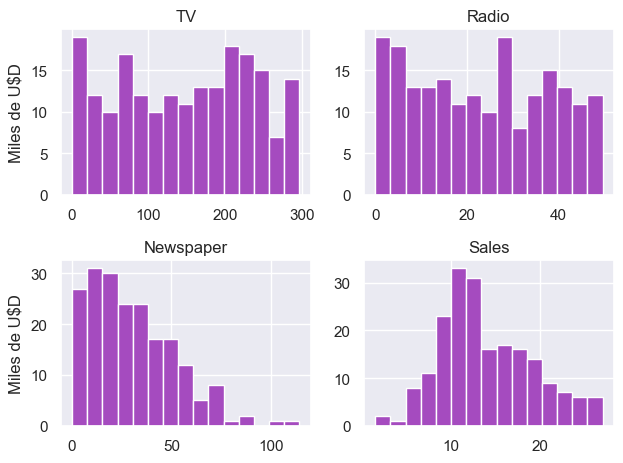

In [20]:
f, ax = plt.subplots(2,2)
ax[0,0].hist(dataset["TV"], bins=15, color="#a54bbf")
ax[0,1].hist(dataset["Radio"], bins=15, color="#a54bbf")
ax[1,0].hist(dataset["Newspaper"], bins=15, color="#a54bbf")
ax[1,1].hist(dataset["Sales"], bins=15, color="#a54bbf")
ax[0,0].set_title("TV")
ax[0,1].set_title("Radio")
ax[1,0].set_title("Newspaper")
ax[1,1].set_title("Sales")
ax[0,0].set_ylabel("Miles de U$D")
ax[1,0].set_ylabel("Miles de U$D")
plt.tight_layout()
plt.show();

Recordemos que para saber si puede haber una relación lineal, podemos ver la correlación de todos los atributos, y nuestro target `Sales`. 

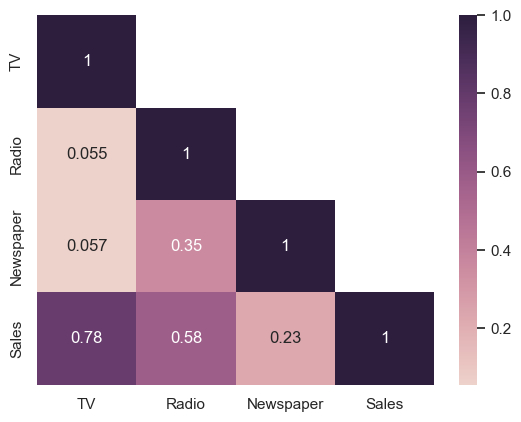

In [21]:
corr_matrix = dataset.corr()
mask = (np.tril(np.ones_like(corr_matrix)) - 1) * (-1)
sns.set_theme(style="white")
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()
sns.set_theme(style="darkgrid")

Vemos que tenemos correlación entre las ventas y los tres espacios en los que se hacen campañas de Marketing. Por lo que podemos afirmar que el supuesto de relación lineal puede ser verdadero. Por otro lado, vemos que entre los diferentes features, `TV` no presenta correlación con respecto a `Radio` o `Newspaper`, pero si hay algo de correlación entre `Newspaper` y `Radio`.

Es decir, unos de los supuestos pueden ser que no se cumplan, sigamos aplicando el modelo, pero con cierta noción que quizás una regresión lineal no nos asegure el mejor ajuste.

OBS: Para un análisis exploratorio apropiado de estos datos y cómo proseguir en diferentes partes, se recomienda leer el [capítulo 2](https://www.statlearning.com/) de Gareth James et al.

Veamos la relación entre `Sales` y los tres espacios en los que se hacen campañas de Marketing:

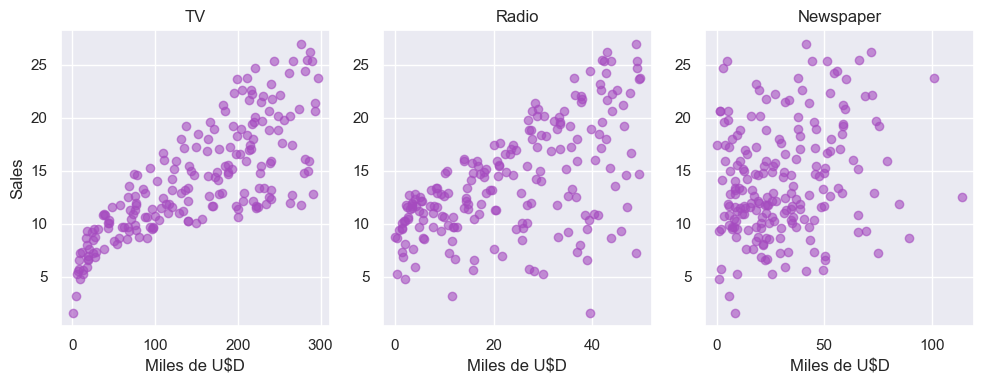

In [22]:
f, ax = plt.subplots(1,3, figsize=(10, 4))
ax[0].scatter(dataset["TV"], dataset["Sales"], color="#a54bbf", alpha=0.6);
ax[1].scatter(dataset["Radio"], dataset["Sales"], color="#a54bbf", alpha=0.6);
ax[2].scatter(dataset["Newspaper"], dataset["Sales"], color="#a54bbf", alpha=0.6);
ax[0].set_title("TV")
ax[1].set_title("Radio")
ax[2].set_title("Newspaper")
ax[0].set_xlabel("Miles de U$D")
ax[1].set_xlabel("Miles de U$D")
ax[2].set_xlabel("Miles de U$D")
ax[0].set_ylabel("Sales")
plt.tight_layout()
plt.show();

Ahora vamos a armar nuestro modelo, para ello vamos a utilizar el proceso que vimos de Machine Learning

![proceso ML](./img/proceso_ml.png)

Es decir, necesitaremos datos de entrenamiento y datos de test. Esto se puede hacer facilmente con la libreria **scikit-learn** que nos permite separar nuestros datos para entrenar y para testear el funcionamiento de nuestro modelo.

Puedes también visitar la pagina de scikit-learn [Aca](https://scikit-learn.org/stable/).

In [23]:
# importando módulo para separar datos de entrenamiento y testeo de scikit-learn
from sklearn.model_selection import train_test_split

In [24]:
# Armamos un DataFrame con los features
X = dataset[["TV", "Radio", "Newspaper"]]
# Y con la variable dependiente (target)
y = dataset["Sales"]

In [25]:
# valores de X
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [26]:
# valores de y
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [27]:
# Cantidad de elementos en X y en y
print("Cantidad de elementos en 'X':", X.shape)
print("Cantidad de elementos en 'y':", y.shape)

Cantidad de elementos en 'X': (200, 3)
Cantidad de elementos en 'y': (200,)


Separamos el dataset de entrenamiento y testeo. Para este problema usamos el tamaño del test de 30% aprox.

In [28]:
# Separando nuestro dataset en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
# Datos de train y de test
print("Valores de X_train:",X_train.size)
print("Valores de y_train:",y_train.size)
print("Valores de X_test:",len(X_test))
print("Valores de y_test:",len(y_test))

Valores de X_train: 420
Valores de y_train: 140
Valores de X_test: 60
Valores de y_test: 60


Vimos que previamente los coeficientes nos pueden dar información de importancia de valores, pero para que esto funcione los valores de cada atributo debe estar en una misma escala. Aplicamos un método de [estandarización](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) para que todos estén dentro de la misma escala:

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
sc_X = StandardScaler()

X_train_scaled = sc_X.fit_transform(X_train)

print(f"Las medias del escalador es {sc_X.mean_}")
print(f"Los desvío estándar del escalador es {np.sqrt(sc_X.var_)}")

Las medias del escalador es [156.38928571  23.525       30.44785714]
Los desvío estándar del escalador es [83.59965712 14.58321503 20.62458473]


Vemos que las medias y desvíos estándares no son iguales al del dataset entero, aunque cercanas, pero dado que esta transformación es algo que hacemos para transformar nuestros datos. Si calculamos el StandardScaler utilizando todo el conjunto de datos (entrenamiento + prueba), estaríamos introduciendo información del conjunto de prueba en el proceso de entrenamiento. Esto puede llevar a una sobreestimación sesgada y poco realista del rendimiento del modelo.

In [32]:
X.describe().loc[["mean", "std"], :]

,TV,Radio,Newspaper
mean,147.042500,23.264000,30.554000
std,85.854236,14.846809,21.778621


In [33]:
# Escalemos el set de testeo
X_test_scaled = sc_X.transform(X_test)

In [34]:
# Volvemos dataframes a los resultados del escalador
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

X_train_scaled.head()

,TV,Radio,Newspaper
0,1.530039,-0.886293,-1.165980
1,0.341039,-0.173144,-0.409601
2,-0.520209,-0.420003,0.395263
3,-1.586003,0.793721,1.718926
4,1.606594,-1.332011,-1.064160


Con todo el dataset procesado, vamos a aplicar la regresión lineal:

In [35]:
regresion_marketing = LinearRegression()
regresion_marketing.fit(X_train_scaled, y_train)

print(f"El valor de la interseccion de la recta es {regresion_marketing.intercept_ }")
print(f"Los valores de los coeficientes de la recta es {regresion_marketing.coef_ }")

El valor de la interseccion de la recta es 14.497142857142858
Los valores de los coeficientes de la recta es [3.68334078 2.90625242 0.14194772]


Dado que normalizamos los datos, tenemos seguridad de lo que nos dicen los coeficientes. Nos están diciendo que los valores se observa que `TV` y `Radio` tienen más importancia en ventas que `Newspaper`.

Ahora, ¿pero lo hicimos bien? ¿Es un buen modelo? Con los datos sintéticos lo sabíamos porque ya teníamos idea de lo que tenían que valer los coeficientes, pero acá no tenemos esa relación.

----
### Metricas

Entrenamos el modelo, pero para validar si está bien entrenado, debemos usar el dataset de testeo. 

Vamos a aplicar las siguientes métricas de evaluación usando scikit-learn:
- R2
- MAE
- MSE
- RMSE
- MAPE

In [36]:
#Primero obtenemos las predicciones del modelo
y_pred_training = regresion_marketing.predict(X_train_scaled)
y_pred_test = regresion_marketing.predict(X_test_scaled)

In [37]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error, mean_absolute_percentage_error

Primero veamos cómo nos fue con el set de entrenamiento:

In [38]:
r2 = r2_score(y_train, y_pred_training)
mae = mean_absolute_error(y_train, y_pred_training)
mse = mean_squared_error(y_train, y_pred_training)
rmse = root_mean_squared_error(y_train, y_pred_training)
mape = mean_absolute_percentage_error(y_train, y_pred_training)

In [39]:
print("R-cuadrado en train:", r2)
print("Error absoluto medio en train:", mae)
print("Error cuadratico medio en train:", mse)
print("Raiz de error cuadratico medio en train:", rmse)
print(f"Error absoluto porcentual medio en train: {mape*100:.2f}%")

R-cuadrado en train: 0.9055159502227753
Error absoluto medio en train: 1.1581502948072528
Error cuadratico medio en train: 2.4793551789057866
Raiz de error cuadratico medio en train: 1.574596830590544
Error absoluto porcentual medio en train: 13.58%


Vemos que el ajuste en el set de entrenamiento es muy bueno, con un $R^2 \approx 0.9$, además que el valor de MAE es del orden de la unidad de miles de U$D cuando el desvío estándar es aproximado de 5, indicandonos que el modelo logra tomar una gran cantidad de la varianza de los datos.

Pero vamos a lo importante, ¿logramos generalizar? es decir, ¿funciona para datos nuevos que el modelo no fue usado para entrenar?

In [40]:
r2 = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = root_mean_squared_error(y_test, y_pred_test)
mape = mean_absolute_percentage_error(y_test, y_pred_test)

print("R-cuadrado en test:", r2)
print("Error absoluto medio en test:", mae)
print("Error cuadratico medio en test:", mse)
print("Raiz de error cuadratico medio en test:", rmse)
print(f"Error absoluto porcentual medio en test: {mape*100:.2f}%")

R-cuadrado en test: 0.8609466508230366
Error absoluto medio en test: 1.5116692224549089
Error cuadratico medio en test: 3.7967972367152245
Raiz de error cuadratico medio en test: 1.9485372043446398
Error absoluto porcentual medio en test: 16.30%


Vemos que los valores son menores, tal como esperamos, pero están dentro del orden, lo que es bueno! El modelo generaliza y podemos usarlo para realizar predicciones.

Por ejemplo, supongamos que nos preguntan cuánto se estima cuáles van a aumentar las ventas, dado el presupuesto de el presupuesto de TV se duplica, dado el presupuesto inicial:

- `TV`: 69.3
- `Radio`: 9.2
- `Newspaper`: 0.88

In [41]:
x_old = np.array([[69.3, 9.2, 0.88]])
x_new = np.array([[69.3 * 2, 9.2, 0.88]])

X_all = pd.DataFrame(np.concatenate([x_old, x_new], axis=0), columns=X.columns)

In [42]:
X_all

,TV,Radio,Newspaper
0,69.3,9.2,0.88
1,138.6,9.2,0.88


Calculemos la predicción de ventas para cada caso:

In [43]:
# No nos olvidemos que debemos normalizar
X_all_scaled = sc_X.transform(X_all)

X_all_scaled = pd.DataFrame(X_all_scaled, columns=X.columns)

In [44]:
X_all_scaled

,TV,Radio,Newspaper
0,-1.041742,-0.982294,-1.433622
1,-0.212791,-0.982294,-1.433622


In [45]:
y_all = regresion_marketing.predict(X_all_scaled)
y_all

array([ 7.60175879, 10.65506696])

Entonces, calculemos cuanto se incrementarian las ventas:

In [46]:
increment_p = (y_all[1] - y_all[0]) / y_all[0]
print(f"Las ventas se incrementan un {increment_p*100:.2f}%, si se duplica el presupuesto en TV")

Las ventas se incrementan un 40.17%, si se duplica el presupuesto en TV


Este incremento en ventas es conveniente para el costo que va a dar, esas son preguntas que ahora puede responder con seguridad el equipo de negocios. 

Ahora, nos piden el modelo para que lo puedan usar, entonces lo podemos exportar para que pueda ser usado:

In [47]:
# Podemos utilizar pickle, existen otras herramientas, pero con esto bastará.
import pickle

with open('modelo_marketing.pkl', 'wb') as archivo:
    pickle.dump(regresion_marketing, archivo)

In [48]:
#Podemos llamarlo para usarlo con otros valores y predecir según lo que nosotros queremos.
with open('modelo_marketing.pkl', 'rb') as archivo:
    loaded_model = pickle.load(archivo)

In [49]:
# Pasándole nuevos datos a por predecir... ¡Ojo con la forma de pasarlos!
x_after = pd.DataFrame(np.array([[69.3, 9.2, 0.88]]), columns=X.columns)

prediction = loaded_model.predict(x_after) 
prediction

array([296.61509525])

---

### Regresión de funciones bases

Veamos algunas regresiones más avanzadas que la lineal usando funciones bases. Para ello, volvamos a usar datos sintéticos, una relación senoidal con ruido blanco:

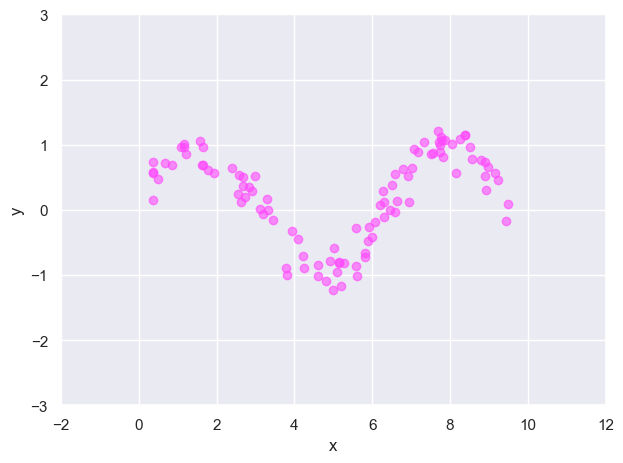

In [50]:
rng = np.random.RandomState(20)
x = 10 * rng.rand(100)
y = np.sin(x) + 0.2 * rng.randn(100)

plt.scatter(x, y, color="#ff48fd", alpha=0.6);
plt.xlim(-2, 12)
plt.ylim(-3, 3)
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()
plt.show()

Empecemos usando una regresión polinomial, utilizando el transformador [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) de Scikit-Learn:

In [51]:
from sklearn.preprocessing import PolynomialFeatures

Este transformador funciona aplicando todas las combinaciones posibles para obtener los valores de diferentes órdenes, por ejemplo en este caso de orden tres con dos atributos (columnas `a` y `b`) se va a obtener las siguientes columnas:

- $ a $
- $ b $
- $ a^2 $
- $ a * b $
- $ b^2 $
- $ a^3 $
- $ a^2 * b $
- $ a * b^2 $
- $ b^3 $

In [52]:
xx = np.array([[2, 2], 
              [3, 2],
              [4, 2]])
poly = PolynomialFeatures(3, include_bias=False)

poly.fit_transform(xx)

array([[ 2.,  2.,  4.,  4.,  4.,  8.,  8.,  8.,  8.],
       [ 3.,  2.,  9.,  6.,  4., 27., 18., 12.,  8.],
       [ 4.,  2., 16.,  8.,  4., 64., 32., 16.,  8.]])

Entonces podemos hacer uso de este transformado para el caso de la funcion senoidal, usando un polinomio de grado 5:

In [53]:
# Previo separemos un set de entrenamiento y de testeo para evaluar posteriormente
x_train, x_test, y_train, y_test = train_test_split(x.reshape([-1, 1]), y, test_size=0.25, random_state=42)

In [54]:
pol_five_features = PolynomialFeatures(5)
x_train_orden_five = pol_five_features.fit_transform(x_train)
x_test_orden_five = pol_five_features.transform(x_test)

# Escalamos para evitar errores numéricos
stand_five = StandardScaler()
x_train_orden_five_scaled = stand_five.fit_transform(x_train_orden_five)
x_test_orden_five_scaled = stand_five.transform(x_test_orden_five)

Una vez que obtuvimos los valores, podemos aplicar una regresión lineal:

In [55]:
reg_pol = LinearRegression()
reg_pol.fit(x_train_orden_five_scaled, y_train)

LinearRegression()

Grafiquemos la regresión:

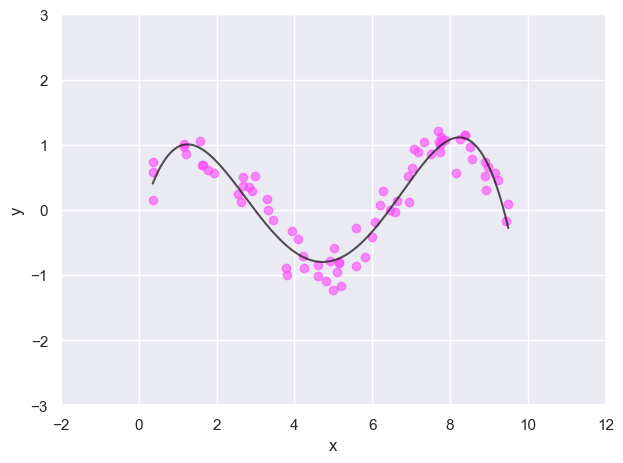

In [56]:
xx = np.linspace(np.min(x), np.max(x), 1000).reshape([-1, 1])
yy = reg_pol.predict(stand_five.transform(pol_five_features.transform(xx)))

plt.plot(xx, yy, color="k", alpha=0.75);
plt.scatter(x_train, y_train, color="#ff48fd", alpha=0.6);
plt.xlim(-2, 12)
plt.ylim(-3, 3)
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()
plt.show()

Podemos comparar los resultados igual que hicimos con la regresión lineal, los mismos parámetros de evaluación funcionan aqui:

In [57]:
#Primero obtenemos las predicciones del modelo
y_pred_training = reg_pol.predict(x_train_orden_five_scaled)
y_pred_test = reg_pol.predict(x_test_orden_five_scaled)

In [58]:
r2 = r2_score(y_train, y_pred_training)
mae = mean_absolute_error(y_train, y_pred_training)
rmse = root_mean_squared_error(y_train, y_pred_training)

print("R-cuadrado con polinomio de orden 5 con respecto a train:", r2)
print("Error absoluto medio con polinomio de orden 5 con respecto a train:", mae)
print("Raiz de error cuadratico medio con polinomio de orden 5 con respecto a train:", rmse)

R-cuadrado con polinomio de orden 5 con respecto a train: 0.8864974785588827
Error absoluto medio con polinomio de orden 5 con respecto a train: 0.19433594647648506
Raiz de error cuadratico medio con polinomio de orden 5 con respecto a train: 0.23847789565824823


In [59]:
r2 = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = root_mean_squared_error(y_test, y_pred_test)

print("R-cuadrado con polinomio de orden 5 con respecto a test:", r2)
print("Error absoluto medio con polinomio de orden 5 con respecto a test:", mae)
print("Raiz de error cuadratico medio con polinomio de orden 5 con respecto a test:", rmse)

R-cuadrado con polinomio de orden 5 con respecto a test: 0.8800977460776497
Error absoluto medio con polinomio de orden 5 con respecto a test: 0.1556265468729574
Raiz de error cuadratico medio con polinomio de orden 5 con respecto a test: 0.19810667769915138


----

#### Error de sesgo y varianza

Esto nos permite ver los diferentes tipos de errores, tanto de error de sesgo cuando el modelo no tiene suficiente complejidad, como el caso que tenemos mucho error de varianza, en el que tiene muchisima complejidad. 

Empecemos con el caso de error de sesgo, para ello ajustamos un polinomio de orden 3:

In [60]:
# Usemos esta funcion para simplificar los cálculos
# https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html
from sklearn.pipeline import make_pipeline

poly_order_3_model = make_pipeline(PolynomialFeatures(degree=3),
                                   StandardScaler(),
                                   LinearRegression())

In [61]:
poly_order_3_model.fit(x_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

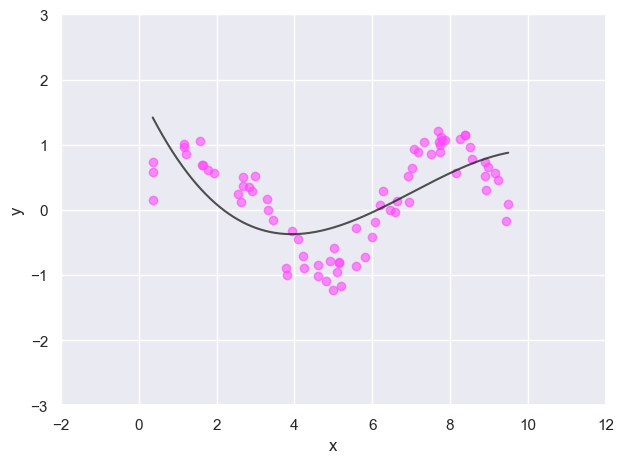

In [62]:
xx = np.linspace(np.min(x), np.max(x), 1000).reshape([-1, 1])
yy = poly_order_3_model.predict(xx)

plt.plot(xx, yy, color="k", alpha=0.75);
plt.scatter(x_train, y_train, color="#ff48fd", alpha=0.6);
plt.xlim(-2, 12)
plt.ylim(-3, 3)
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()
plt.show()

Veamos ahora las metricas del modelo:

In [63]:
y_pred_training = poly_order_3_model.predict(x_train)
y_pred_test = poly_order_3_model.predict(x_test)

In [64]:
r2 = r2_score(y_train, y_pred_training)
mae = mean_absolute_error(y_train, y_pred_training)
rmse = root_mean_squared_error(y_train, y_pred_training)

print("R-cuadrado con polinomio de orden 3 con respecto a train:", r2)
print("Error absoluto medio con polinomio de orden 3 con respecto a train:", mae)
print("Raiz de error cuadratico medio con polinomio de orden 3 con respecto a train:", rmse)

R-cuadrado con polinomio de orden 3 con respecto a train: 0.44892315378497316
Error absoluto medio con polinomio de orden 3 con respecto a train: 0.46046150571920264
Raiz de error cuadratico medio con polinomio de orden 3 con respecto a train: 0.5254742732807604


In [65]:
r2 = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = root_mean_squared_error(y_test, y_pred_test)

print("R-cuadrado con polinomio de orden 3 con respecto a test:", r2)
print("Error absoluto medio con polinomio de orden 3 con respecto a test:", mae)
print("Raiz de error cuadratico medio con polinomio de orden 3 con respecto a test:", rmse)

R-cuadrado con polinomio de orden 3 con respecto a test: 0.2707989283729392
Error absoluto medio con polinomio de orden 3 con respecto a test: 0.4287660138675167
Raiz de error cuadratico medio con polinomio de orden 3 con respecto a test: 0.488550081865671


Vemos que el efecto de error de sesgo hace que tanto el modelo de entrenamiento y de predicción no pueda capturar el comportamiento de la variable.

En cambio si entrenamos una regresion polinomica de orden 14:

In [66]:
poly_order_14_model = make_pipeline(PolynomialFeatures(degree=14),
                                    StandardScaler(),
                                    LinearRegression())

In [67]:
poly_order_14_model.fit(x_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=14)),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

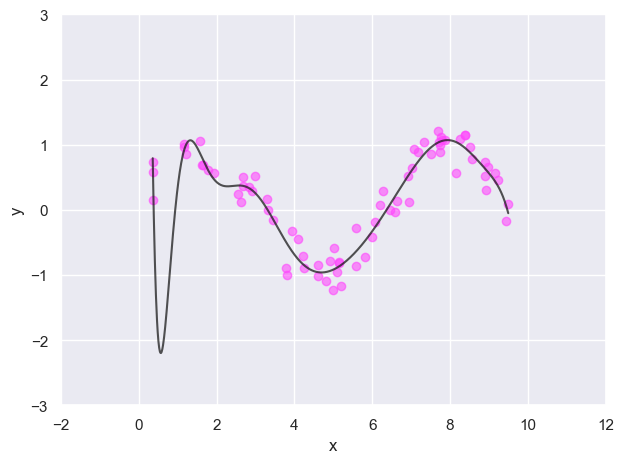

In [68]:
xx = np.linspace(np.min(x), np.max(x), 1000).reshape([-1, 1])
yy = poly_order_14_model.predict(xx)

plt.plot(xx, yy, color="k", alpha=0.75);
plt.scatter(x_train, y_train, color="#ff48fd", alpha=0.6);
plt.xlim(-2, 12)
plt.ylim(-3, 3)
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()
plt.show()

In [69]:
y_pred_training = poly_order_14_model.predict(x_train)
y_pred_test = poly_order_14_model.predict(x_test)

In [70]:
r2 = r2_score(y_train, y_pred_training)
mae = mean_absolute_error(y_train, y_pred_training)
rmse = root_mean_squared_error(y_train, y_pred_training)

print("R-cuadrado con polinomio de orden 14 con respecto a train:", r2)
print("Error absoluto medio con polinomio de orden 14 con respecto a train:", mae)
print("Raiz de error cuadratico medio con polinomio de orden 14 con respecto a train:", rmse)

R-cuadrado con polinomio de orden 14 con respecto a train: 0.9264867693464247
Error absoluto medio con polinomio de orden 14 con respecto a train: 0.15042783446572516
Raiz de error cuadratico medio con polinomio de orden 14 con respecto a train: 0.1919234891894848


In [71]:
r2 = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = root_mean_squared_error(y_test, y_pred_test)

print("R-cuadrado con polinomio de orden 14 con respecto a test:", r2)
print("Error absoluto medio con polinomio de orden 14 con respecto a test:", mae)
print("Raiz de error cuadratico medio con polinomio de orden 14 con respecto a test:", rmse)

R-cuadrado con polinomio de orden 14 con respecto a test: -0.7704083228265632
Error absoluto medio con polinomio de orden 14 con respecto a test: 0.40038674547813796
Raiz de error cuadratico medio con polinomio de orden 14 con respecto a test: 0.7612409850640116


Vemos que el efecto de error de varianza hace que el set de entrenamiento tenga un buen ajuste pero el de predicción tenga un muy mal resultado, no pudiendo generalizar.

Veamos la evolución de MAE versus el orden del polinomio de regresión:

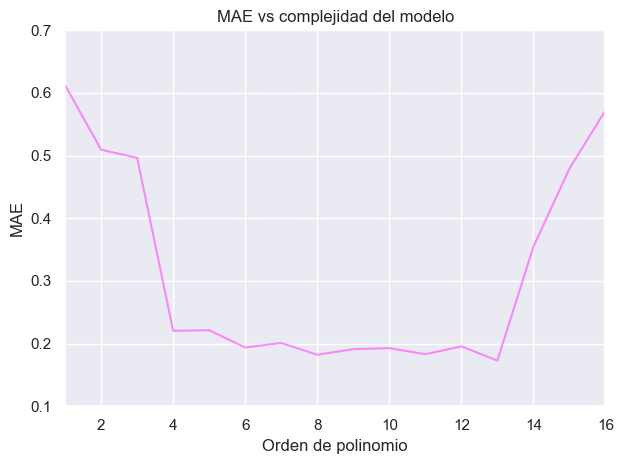

In [72]:
from sklearn.model_selection import cross_val_score
mae_values = []
pol_order = list(range(1, 20))
for i in pol_order:
    poly_order = make_pipeline(PolynomialFeatures(degree=i),
                               StandardScaler(),
                               LinearRegression())
    mae_score = cross_val_score(poly_order, x_train, y_train, n_jobs=-1, scoring='neg_mean_absolute_error')

    mae_values.append(np.mean(mae_score) * (-1))

plt.plot(pol_order, mae_values, color="#ff48fd", alpha=0.6)
plt.xlim(1, 16)
plt.ylim(0.1, 0.7)
plt.title("MAE vs complejidad del modelo")
plt.xlabel("Orden de polinomio")
plt.ylabel("MAE")
plt.tight_layout()
plt.show()

----

## Regresión Lasso y Ridge

Para ver el efecto de las regularizaciones L1 y L2 en la regresión polinomicas, vamos a usar el caso anterior del polinomio de grado 14:

In [73]:
rng = np.random.RandomState(20)
x = 10 * rng.rand(100)
y = np.sin(x) + 0.2 * rng.randn(100)

x_train, x_test, y_train, y_test = train_test_split(x.reshape([-1, 1]), y, test_size=0.25, random_state=42)

En Scikit-Learn tenemos a las dos regresiones, [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) y [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html). Aqui usaremos solo Ridge:

In [74]:
from sklearn.linear_model import Ridge

poly_order_14_model = make_pipeline(PolynomialFeatures(degree=14),
                                    StandardScaler(),
                                    LinearRegression())

poly_order_14_ridge_model = make_pipeline(PolynomialFeatures(degree=14),
                                          StandardScaler(),
                                          Ridge(alpha=0.006))

In [75]:
poly_order_14_model.fit(x_train, y_train)
poly_order_14_ridge_model.fit(x_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=14)),
                ('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=0.006))])

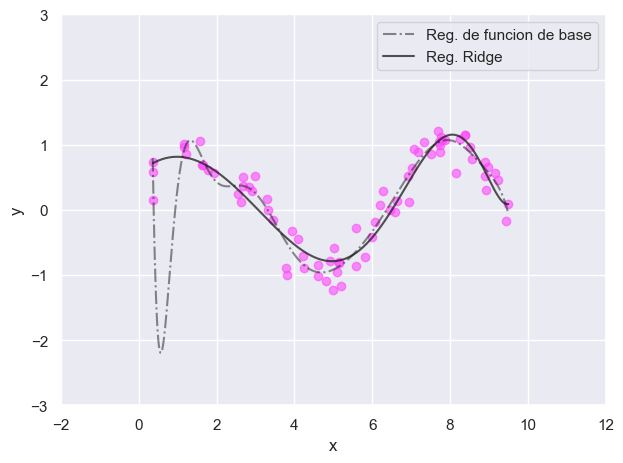

In [76]:
xx = np.linspace(np.min(x), np.max(x), 1000).reshape([-1, 1])
yy = poly_order_14_model.predict(xx)
yy2 = poly_order_14_ridge_model.predict(xx)

plt.scatter(x_train, y_train, color="#ff48fd", alpha=0.6)
plt.plot(xx, yy, color="k", ls="-.", alpha=0.5, label="Reg. de funcion de base")
plt.plot(xx, yy2, color="k", alpha=0.75, label="Reg. Ridge")
plt.xlim(-2, 12)
plt.ylim(-3, 3)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.tight_layout()
plt.show()

Comparamos los resultados de ambos modelos con el set de evaluación:

In [77]:
y_pred = poly_order_14_model.predict(x_test)
y_pred_ridge = poly_order_14_ridge_model.predict(x_test)

r2 = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = root_mean_squared_error(y_test, y_pred_test)

r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = root_mean_squared_error(y_test, y_pred_ridge)

print("Pol. orden 14:")
print("  R-cuadrado:", r2)
print("  Error absoluto medio:", mae)
print("  Raiz de error cuadratico medio:", rmse)

print("\nRidge:")
print("  R-cuadrado:", r2_ridge)
print("  Error absoluto medio:", mae_ridge)
print("  Raiz de error cuadratico medio:", rmse_ridge)

Pol. orden 14:
  R-cuadrado: -0.7704083228265632
  Error absoluto medio: 0.40038674547813796
  Raiz de error cuadratico medio: 0.7612409850640116

Ridge:
  R-cuadrado: 0.8499297785611094
  Error absoluto medio: 0.18048370032237035
  Raiz de error cuadratico medio: 0.22163212117060885
